
# Diabetes Dataset: End-to-End Regression Workflow

Complete ML pipeline for sklearn's diabetes regression dataset.

## Sections:
- Setup and imports
- Load data and EDA
- Train/Test split
- Baseline Linear Regression
- Regularized models (Ridge, Lasso) with cross-validation
- Model comparison and evaluation
- Residual analysis
- Feature importance
- Save best model


## 1. Setup and Imports

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

print('Libraries imported successfully')


Libraries imported successfully


## 2. Load Dataset

In [22]:

# Load diabetes dataset
diabetes = datasets.load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

print('Dataset shape:', X.shape)
print('Target shape:', y.shape)
print('\nFeature names:', list(X.columns))


Dataset shape: (442, 10)
Target shape: (442,)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## 3. Exploratory Data Analysis

In [23]:

# Data overview
print('Dataset head:')
print(X.head())
print('\nDataset info:')
print(X.info())
print('\nTarget statistics:')
print(y.describe())


Dataset head:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null 

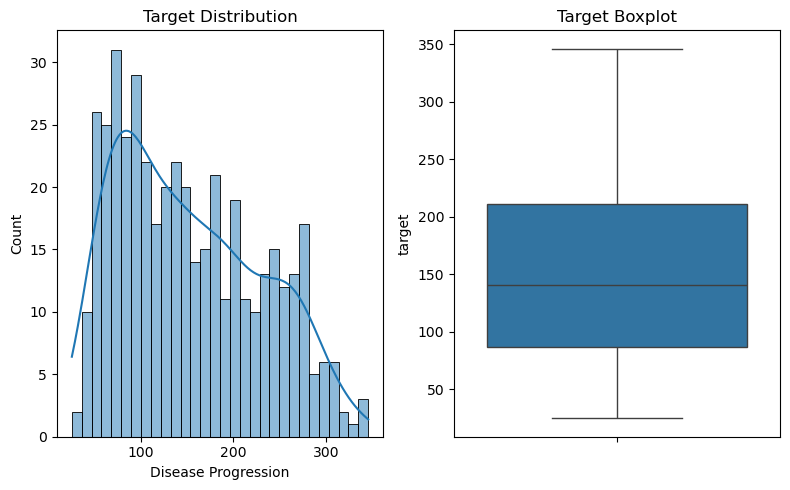

In [24]:

# Target distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True)
plt.title('Target Distribution')
plt.xlabel('Disease Progression')

plt.subplot(1, 2, 2)
sns.boxplot(y=y)
plt.title('Target Boxplot')
plt.tight_layout()
plt.show()


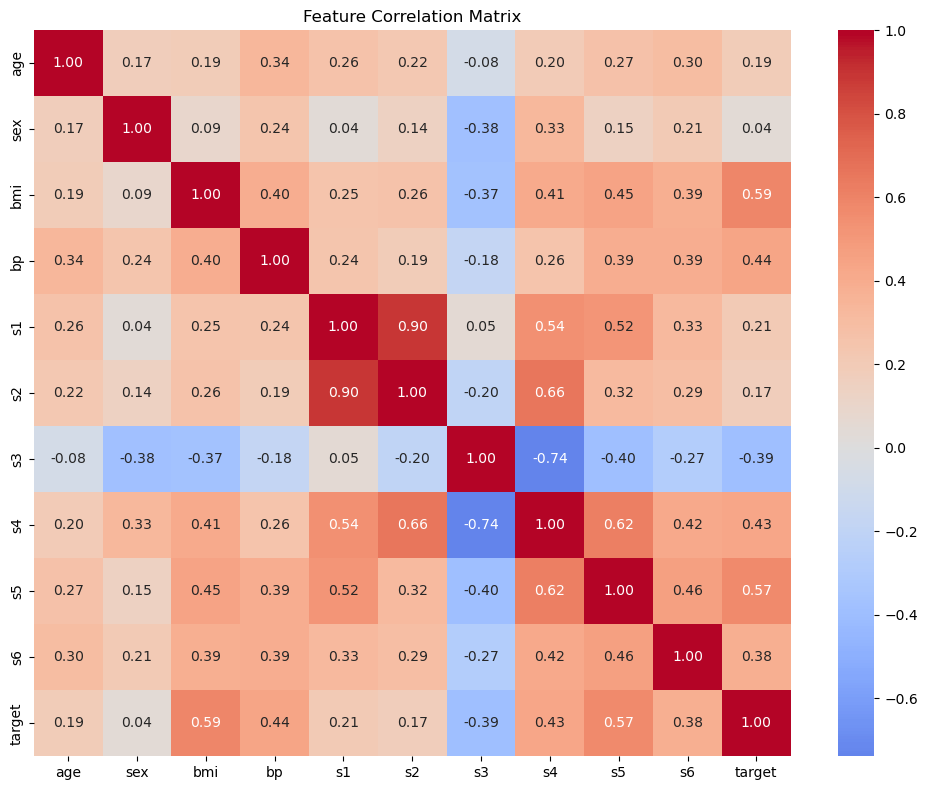

In [25]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_data = pd.concat([X, y], axis=1)
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


## 4. Train/Test Split

In [26]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)


Training set shape: (353, 10)
Test set shape: (89, 10)


## 5. Model Training and Evaluation

In [27]:
# Re-train and evaluate models using mean_squared_error without the 'squared' argument (for older sklearn)
# Also switch GridSearchCV scoring to neg_mean_squared_error and take square roots manually for RMSE.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Sanity checks for prerequisites
print('Have X_train:', 'X_train' in globals())
print('Have X_test:', 'X_test' in globals())
print('Have y_train:', 'y_train' in globals())
print('Have y_test:', 'y_test' in globals())

# Define models
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(max_iter=10000))
    ])
}

# Hyperparameter grids
param_grids = {
    'Linear Regression': {},
    'Ridge': {'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
}

# Train and evaluate models
results = {}
best_models = {}

for name, model in models.items():
    print('Training ' + name + ' ...')
    if name in param_grids and len(param_grids[name]) > 0:
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print('Best parameters: ' + str(grid_search.best_params_))
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Metrics (compute RMSE manually)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }

    best_models[name] = best_model
    print('Test R2 for ' + name + ': ' + str(test_r2))
    print('')

Have X_train: True
Have X_test: True
Have y_train: True
Have y_test: True
Training Linear Regression ...
Test R2 for Linear Regression: 0.4526027629719196

Training Ridge ...
Best parameters: {'model__alpha': 10.0}
Test R2 for Ridge: 0.45721095677808476

Training Lasso ...
Best parameters: {'model__alpha': 1.0}
Test R2 for Lasso: 0.46687670944102466



Model Performance Comparison:
                   train_mae  train_rmse  train_r2  test_mae  test_rmse  \
Linear Regression    43.4835     53.5588    0.5279   42.7941    53.8534   
Ridge                43.6385     53.7356    0.5248   42.8568    53.6263   
Lasso                43.8391     53.8629    0.5225   42.8030    53.1467   

                   test_r2  
Linear Regression   0.4526  
Ridge               0.4572  
Lasso               0.4669  


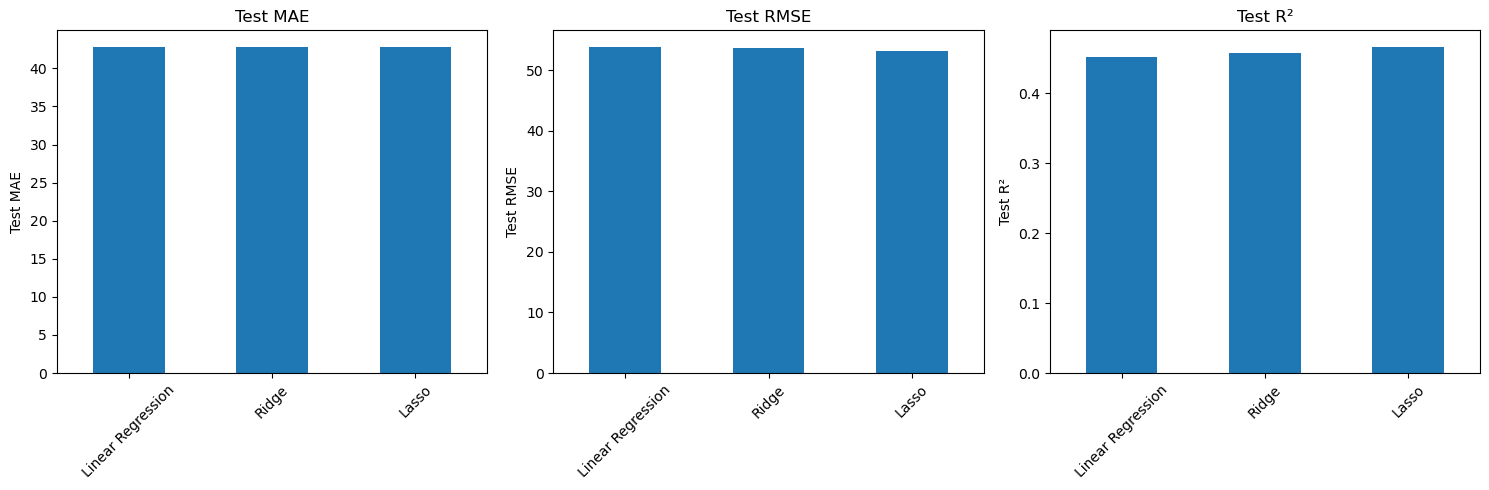

In [28]:

# Create results DataFrame
results_df = pd.DataFrame(results).T
print('Model Performance Comparison:')
print(results_df.round(4))

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['test_mae', 'test_rmse', 'test_r2']
titles = ['Test MAE', 'Test RMSE', 'Test R²']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    results_df[metric].plot(kind='bar', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_ylabel(title)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 6. Residual Analysis

Best model: Lasso
Test R²: 0.4669


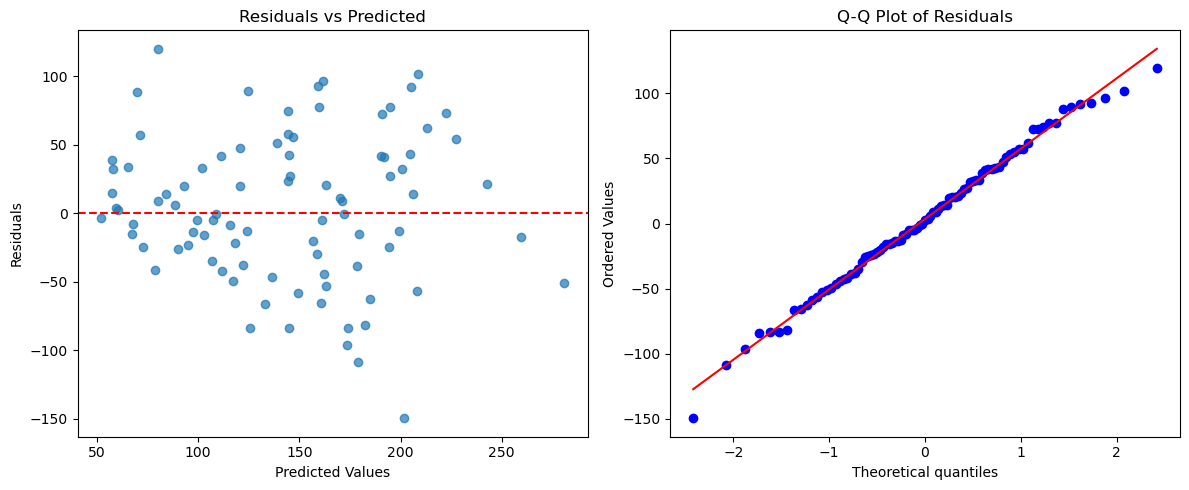

In [29]:

# Find best model
best_model_name = results_df['test_r2'].idxmax()
best_model = best_models[best_model_name]

print(f'Best model: {best_model_name}')
print(f'Test R²: {results_df.loc[best_model_name, "test_r2"]:.4f}')

# Residual plots
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred, residuals, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


Feature Importance (by absolute coefficient):
  feature  coefficient  abs_coefficient
2     bmi    26.219225        26.219225
8      s5    22.636465        22.636465
3      bp    15.657314        15.657314
1     sex    -9.297519         9.297519
6      s3    -9.024087         9.024087
4      s1    -8.228172         8.228172
7      s4     3.420861         3.420861
9      s6     2.098647         2.098647
0     age     0.687032         0.687032
5      s2    -0.000000         0.000000


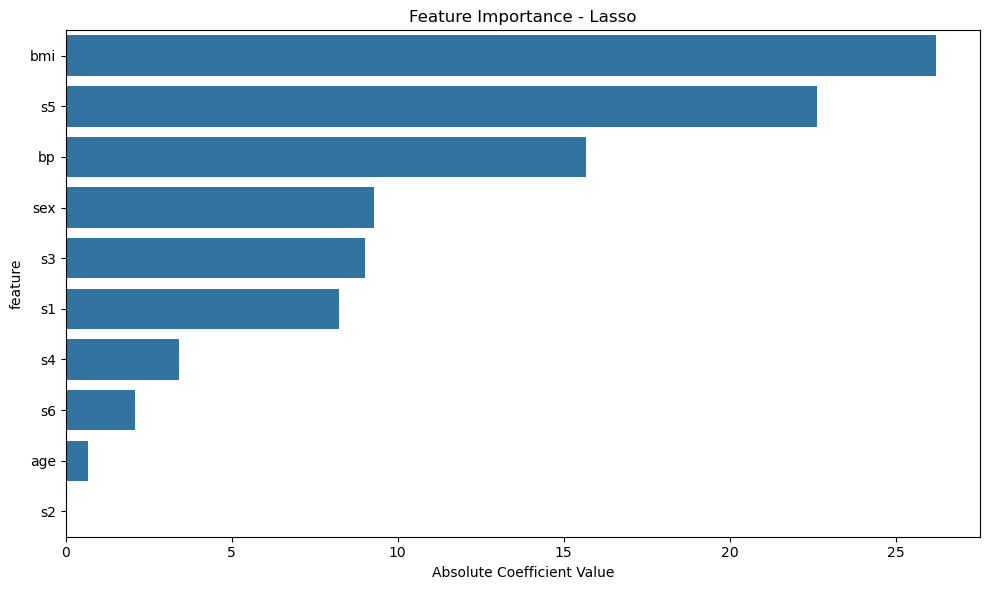

In [30]:

# Feature coefficients for best model
if hasattr(best_model.named_steps['model'], 'coef_'):
    coefficients = best_model.named_steps['model'].coef_
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    }).sort_values('abs_coefficient', ascending=False)
    
    print('Feature Importance (by absolute coefficient):')
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='abs_coefficient', y='feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Absolute Coefficient Value')
    plt.tight_layout()
    plt.show()


## 7. Save Best Model

In [31]:

# Save the best model
model_filename = f'best_diabetes_model_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_filename)
print(f'Best model saved as: {model_filename}')

# Save results
results_df.to_csv('diabetes_model_results.csv')
print('Results saved as: diabetes_model_results.csv')


Best model saved as: best_diabetes_model_lasso.pkl
Results saved as: diabetes_model_results.csv
